<a href="https://colab.research.google.com/github/denniss83/Kripto-Para-Arbitraj-/blob/main/Kripto_Para_Arbitraj%C4%B1_Borsalar_Aras%C4%B1_BTC_USDT_ve_ETH_USDT_Fiyat_Fark%C4%B1_Analizi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lisans
Bu notebook, [Deniz Atabey](https://github.com/denniss83) tarafından hazırlanmıştır.  
Telif Hakkı © 2025 Deniz Atabey  
Bu çalışma [Creative Commons Atıf-GayriTicari 4.0 Uluslararası (CC BY-NC 4.0)](https://creativecommons.org/licenses/by-nc/4.0/) lisansı ile lisanslanmıştır.

- Yalnızca eğitim, akademik ve kişisel kullanım içindir.
- Ticari amaçlarla kullanılamaz.
- Herhangi bir kısmını kullanırsanız lütfen kaynak gösterin.

# 💱 Kripto Para Arbitrajı: Borsalar Arası BTC/USDT ve ETH/USDT Fiyat Farkı Analizi



---

⚠️❗️ **Bu analiz yalnızca veri bilimi eğitimi ve portföy geliştirme amacıyla yapılmıştır. Hiçbir yatırım tavsiyesi içermez.**


---
Arbitraj, finansal piyasalarda aynı varlığın farklı piyasalardaki fiyat farklarından yararlanarak risksiz kâr elde etme stratejisidir.Aynı ürünün bir pazarda ucuza, diğer pazarda pahalıya satılması durumudur. Aradaki fiyat farkı size risksiz kâr fırsatı sunar.


Bu çalışmada, farklı kripto para borsalarında işlem gören BTC/USDT ve ETH/USDT pariteleri arasındaki fiyat farklılıkları analiz edilmiştir.  
Amaç, arbitraj fırsatlarını gerçek zamanlı olarak tespit etmek ve bu fırsatların sıklığını ve büyüklüğünü ölçmektir.



# Gerekli Kütüphaneler

In [ ]:
import requests
import pandas as pd
import datetime
import time
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

plt.style.use("seaborn-v0_8-whitegrid")

# Borsalardan Gerçek Zamanlı Veri Çekme

Aşağıda CoinGecko veya ilgili API üzerinden Binance ve MEXC borsalarındaki BTC/USDT ve ETH/USDT fiyatları anlık olarak çekilmektedir.
Her 5 dakikada bir alınan bu veriler, fiyat farkı analizine olanak tanır.


In [ ]:
def get_btc_usdt_prices():
    url = "https://api.coingecko.com/api/v3/coins/bitcoin/tickers"
    response = requests.get(url)

    if response.status_code != 200:
        print("❌ API bağlantı hatası:", response.status_code)
        return pd.DataFrame()

    data = response.json()
    tickers = data["tickers"]

    filtered = [t for t in tickers if t["target"] == "USDT"]

    records = []
    for item in filtered:
        exchange = item["market"]["name"]
        price = item["last"]
        records.append({
            "exchange": exchange,
            "price": price,
            "timestamp": datetime.now()

        })

    df = pd.DataFrame(records)
    return df.sort_values(by="price", ascending=False)

In [ ]:
def get_eth_usdt_prices():
    url = "https://api.coingecko.com/api/v3/coins/ethereum/tickers"
    response = requests.get(url)

    if response.status_code != 200:
        print("⚠️ API bağlantı hatası:", response.status_code)
        return pd.DataFrame()

    data = response.json()
    tickers = data["tickers"]

    filtered = [t for t in tickers if t["target"] == "USDT"]
    records = []

    for t in filtered:
        exchange = t["market"]["name"]
        price = t["last"]
        records.append({
            "exchange": exchange,
            "price": price,
            "timestamp": datetime.now()
        })

    df = pd.DataFrame(records)
    return df.sort_values(by="price", ascending=False)

In [ ]:
df_prices = get_btc_usdt_prices()
print("🔍 Farklı borsalardaki BTC/USDT fiyatları:")
display(df_prices.head(10))

🔍 Farklı borsalardaki BTC/USDT fiyatları:


,exchange,price,timestamp
10,WEEX,108171.60,2025-07-05 01:26:18.231262
49,KoinBX,108086.32,2025-07-05 01:26:18.231315
0,CoinW,108042.34,2025-07-05 01:26:18.231237
19,P2B,108000.00,2025-07-05 01:26:18.231277
24,HTX,107994.99,2025-07-05 01:26:18.231283
20,Crypto.com Exchange,107977.99,2025-07-05 01:26:18.231278
14,OKX,107973.00,2025-07-05 01:26:18.231267
18,AscendEX (BitMax),107963.34,2025-07-05 01:26:18.231276
41,BitKan,107962.55,2025-07-05 01:26:18.231302
48,Phemex,107962.22,2025-07-05 01:26:18.231314


In [ ]:
df_eth = get_eth_usdt_prices()
print("🟪 Farklı borsalardaki ETH/USDT fiyatları:")
display(df_eth.head(10))

🟪 Farklı borsalardaki ETH/USDT fiyatları:


,exchange,price,timestamp
16,WEEX,2514.67,2025-07-05 01:26:18.449273
15,GroveX,2512.34,2025-07-05 01:26:18.449272
20,P2B,2510.45,2025-07-05 01:26:18.449278
46,Trubit,2510.44,2025-07-05 01:26:18.449324
48,Dex-Trade,2510.06,2025-07-05 01:26:18.449326
1,Tapbit,2510.03,2025-07-05 01:26:18.449249
24,Zoomex,2509.55,2025-07-05 01:26:18.449283
11,CoinW,2509.34,2025-07-05 01:26:18.449267
47,Bitexlive,2509.16,2025-07-05 01:26:18.449325
19,OrangeX,2509.13,2025-07-05 01:26:18.449277


# Arbitraj Hesaplama Fonksiyonu

İki borsa arasındaki fiyat farkı hesaplanır.  
Örneğin Binance fiyatı düşükse ve MEXC fiyatı yüksekse, Binance'ten alınıp MEXC'te satılarak kâr elde edilebilir.

In [ ]:
def find_arbitrage_opportunity(df_prices):
    max_row = df_prices.loc[df_prices['price'].idxmax()]
    min_row = df_prices.loc[df_prices['price'].idxmin()]

    profit = max_row['price'] - min_row['price']
    profit_percent = (profit / min_row['price']) * 100

    print(f"📈 En Yüksek Fiyat: {max_row['price']} - {max_row['exchange']}")
    print(f"📉 En Düşük Fiyat: {min_row['price']} - {min_row['exchange']}")
    print(f"💰 Fiyat Farkı: {round(profit, 2)} USD")
    print(f"📊 Potansiyel Arbitraj Oranı: {round(profit_percent, 4)} %")
    print(f"🕒 Zaman: {df_prices.loc[0, 'timestamp']}\n")

    return profit_percent

In [ ]:
find_arbitrage_opportunity(df_eth)

📈 En Yüksek Fiyat: 2514.67 - WEEX
📉 En Düşük Fiyat: 2506.05 - Coinstore
💰 Fiyat Farkı: 8.62 USD
📊 Potansiyel Arbitraj Oranı: 0.344 %
🕒 Zaman: 2025-07-05 01:26:18.449242



np.float64(0.343967598411839)

# Veri Kaydı

Arbitraj oranları her ölçümde `.csv` dosyasına kaydedilir:

- `btc_arbitrage_log.csv`
- `eth_arbitrage_log.csv`

In [ ]:
from datetime import datetime
import time

btc_log_list = []
eth_log_list = []

def run_arbitrage_monitoring(interval_minutes=5, repeat_count=12):
    for i in range(repeat_count):
        print(f"\n🔁 {i+1}. Kontrol - {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

        df_btc = get_btc_usdt_prices()
        print("🔸 BTC/USDT Arbitraj Analizi:")
        btc_profit = find_arbitrage_opportunity(df_btc)
        btc_log_list.append((df_btc.loc[0, 'timestamp'], btc_profit))

        df_eth = get_eth_usdt_prices()
        print("🔸 ETH/USDT Arbitraj Analizi:")
        eth_profit = find_arbitrage_opportunity(df_eth)
        eth_log_list.append((df_eth.loc[0, 'timestamp'], eth_profit))

        if i < repeat_count - 1:
            time.sleep(interval_minutes * 60)

    pd.DataFrame(btc_log_list, columns=["timestamp", "profit_percent"]).to_csv("btc_arbitrage_log.csv", index=False)
    pd.DataFrame(eth_log_list, columns=["timestamp", "profit_percent"]).to_csv("eth_arbitrage_log.csv", index=False)
    print("\n✅ CSV dosyalarına başarıyla kaydedildi.")


# Zaman Serili Veri Toplama (Simülasyon)
Bu bölümde 5 saat boyunca her 5 dakikada bir fiyatlar çekilir ve arbitraj fırsatları kontrol edilir.
Sonuçlar bir listeye kaydedilir.


In [ ]:
run_arbitrage_monitoring(interval_minutes=5, repeat_count=60)


🔁 1. Kontrol - 2025-07-05 01:26:18
🔸 BTC/USDT Arbitraj Analizi:
📈 En Yüksek Fiyat: 108171.6 - WEEX
📉 En Düşük Fiyat: 107853.63 - Coinstore
💰 Fiyat Farkı: 317.97 USD
📊 Potansiyel Arbitraj Oranı: 0.2948 %
🕒 Zaman: 2025-07-05 01:26:18.653744

🔸 ETH/USDT Arbitraj Analizi:
📈 En Yüksek Fiyat: 2514.67 - WEEX
📉 En Düşük Fiyat: 2506.05 - Coinstore
💰 Fiyat Farkı: 8.62 USD
📊 Potansiyel Arbitraj Oranı: 0.344 %
🕒 Zaman: 2025-07-05 01:26:18.734985


🔁 2. Kontrol - 2025-07-05 01:31:18
🔸 BTC/USDT Arbitraj Analizi:
📈 En Yüksek Fiyat: 108171.6 - WEEX
📉 En Düşük Fiyat: 107878.64 - Coinstore
💰 Fiyat Farkı: 292.96 USD
📊 Potansiyel Arbitraj Oranı: 0.2716 %
🕒 Zaman: 2025-07-05 01:31:18.827131

🔸 ETH/USDT Arbitraj Analizi:
📈 En Yüksek Fiyat: 2514.67 - WEEX
📉 En Düşük Fiyat: 2507.44 - CoinEx
💰 Fiyat Farkı: 7.23 USD
📊 Potansiyel Arbitraj Oranı: 0.2883 %
🕒 Zaman: 2025-07-05 01:31:18.981980


🔁 3. Kontrol - 2025-07-05 01:36:18
🔸 BTC/USDT Arbitraj Analizi:
📈 En Yüksek Fiyat: 108086.32 - KoinBX
📉 En Düşük Fiyat: 1

In [ ]:
print("BTC örnek:", btc_log_list[0])
print("ETH örnek:", eth_log_list[0])

BTC örnek: (Timestamp('2025-07-05 01:26:18.653744'), np.float64(0.294816224544321))
ETH örnek: (Timestamp('2025-07-05 01:26:18.734985'), np.float64(0.343967598411839))


In [ ]:
btc_df = pd.DataFrame(btc_log_list, columns=['timestamp', 'arbitrage_percent'])
eth_df = pd.DataFrame(eth_log_list, columns=['timestamp', 'arbitrage_percent'])

btc_df['timestamp'] = pd.to_datetime(btc_df['timestamp'])
eth_df['timestamp'] = pd.to_datetime(eth_df['timestamp'])

# Fiyat Farkı Zaman Serisi Grafiği

Bu bölümde, her 5 dakikada bir toplanan arbitraj farkı verileri zaman eksenine göre çizilir.  
Amaç, arbitraj fırsatlarının gün içindeki dağılımını görsel olarak analiz etmektir.


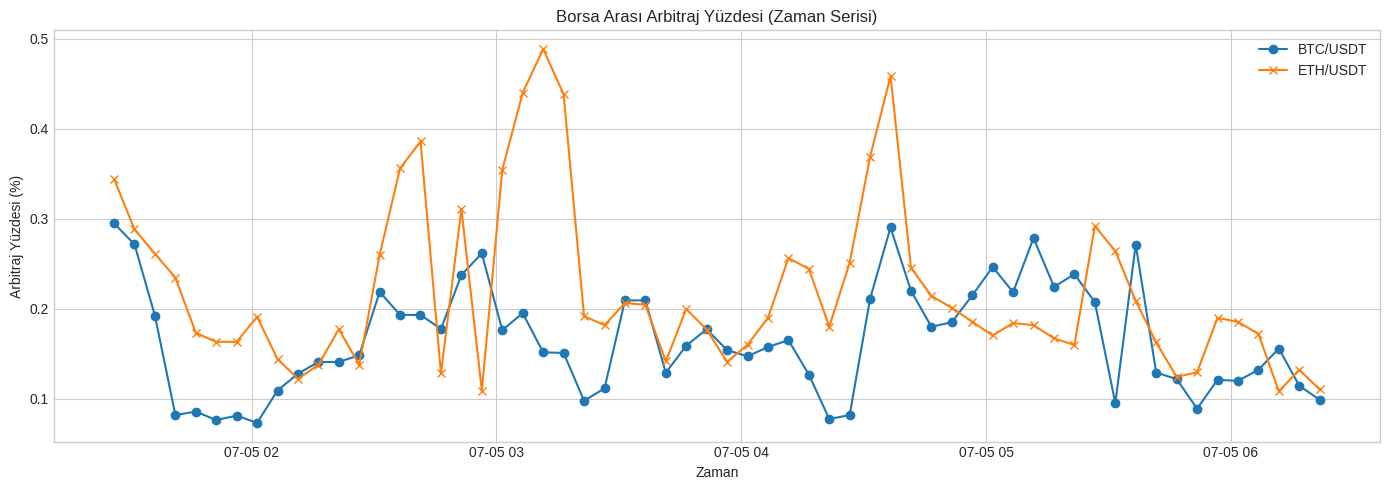

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(btc_df['timestamp'], btc_df['arbitrage_percent'], label='BTC/USDT', marker='o')
plt.plot(eth_df['timestamp'], eth_df['arbitrage_percent'], label='ETH/USDT', marker='x')
plt.title('Borsa Arası Arbitraj Yüzdesi (Zaman Serisi)')
plt.xlabel('Zaman')
plt.ylabel('Arbitraj Yüzdesi (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Arbitraj Fırsatları (Eşik Üstü Analizi)

Bu bölümde, belirli bir kâr eşiği (%0.2, %0.5 gibi) üzerinde olan fırsatlar filtrelenir ve analiz edilir.  
Bu sayede “gerçekten değerlendirilebilir” olan arbitraj fırsatlarının sayısı ve zamanları belirlenir.


✅ BTC/USDT için 18 fırsat bulundu (eşik: %20.0)
✅ ETH/USDT için 25 fırsat bulundu (eşik: %20.0)


/tmp/ipython-input-13-3465437605.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc_opportunities['hour'] = btc_opportunities['timestamp'].dt.hour
/tmp/ipython-input-13-3465437605.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eth_opportunities['hour'] = eth_opportunities['timestamp'].dt.hour


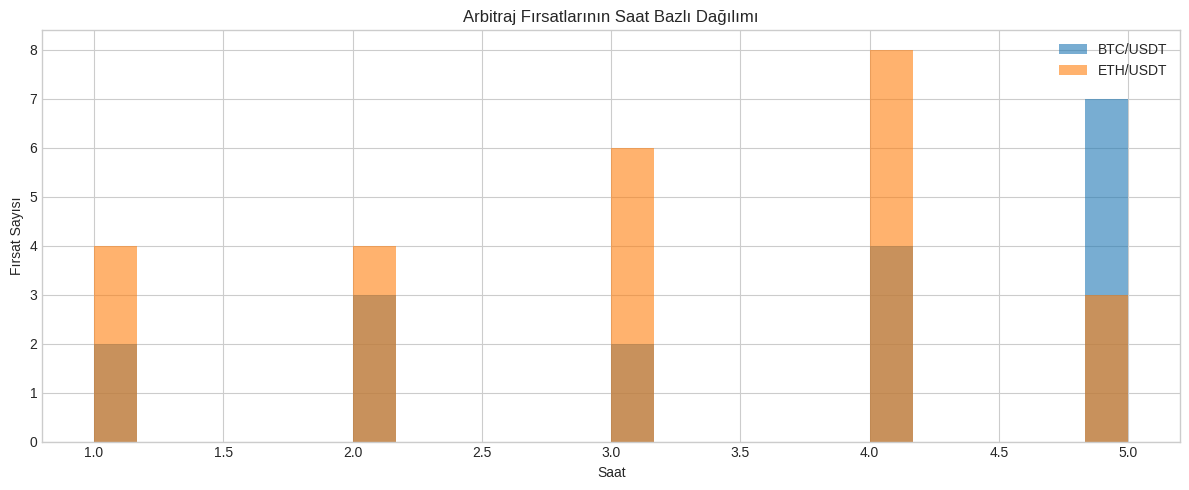

In [ ]:
threshold = 0.2

btc_opportunities = btc_df[btc_df['arbitrage_percent'] >= threshold]
eth_opportunities = eth_df[eth_df['arbitrage_percent'] >= threshold]

print(f"✅ BTC/USDT için {len(btc_opportunities)} fırsat bulundu (eşik: %{threshold*100})")
print(f"✅ ETH/USDT için {len(eth_opportunities)} fırsat bulundu (eşik: %{threshold*100})")

btc_opportunities['hour'] = btc_opportunities['timestamp'].dt.hour
eth_opportunities['hour'] = eth_opportunities['timestamp'].dt.hour

plt.figure(figsize=(12, 5))
plt.hist(btc_opportunities['hour'], bins=24, alpha=0.6, label='BTC/USDT')
plt.hist(eth_opportunities['hour'], bins=24, alpha=0.6, label='ETH/USDT')
plt.xlabel('Saat')
plt.ylabel('Fırsat Sayısı')
plt.title('Arbitraj Fırsatlarının Saat Bazlı Dağılımı')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Fırsat Detaylarının Tablosu

In [ ]:
eth_opportunities_filtered = eth_opportunities[['timestamp', 'arbitrage_percent']]
eth_opportunities_filtered = eth_opportunities_filtered.sort_values(by='arbitrage_percent', ascending=False)
eth_opportunities_filtered.reset_index(drop=True, inplace=True)

eth_opportunities_filtered.head()

,timestamp,arbitrage_percent
0,2025-07-05 03:11:28.321487,0.488350
1,2025-07-05 04:36:36.268591,0.458413
2,2025-07-05 03:06:27.741853,0.439794
3,2025-07-05 03:16:29.026641,0.438107
4,2025-07-05 02:41:24.831315,0.385803


In [ ]:
btc_opportunities_filtered = btc_opportunities[['timestamp', 'arbitrage_percent']]
btc_opportunities_filtered = btc_opportunities_filtered.sort_values(by='arbitrage_percent', ascending=False)
btc_opportunities_filtered.reset_index(drop=True, inplace=True)

btc_opportunities_filtered.head()

,timestamp,arbitrage_percent
0,2025-07-05 01:26:18.653744,0.294816
1,2025-07-05 04:36:35.710733,0.290344
2,2025-07-05 05:11:38.536410,0.278518
3,2025-07-05 01:31:18.827131,0.271564
4,2025-07-05 05:36:41.289725,0.271348



# Sonuç ve Değerlendirme



---

Arbitraj Neden Önemlidir?
1. Piyasa Verimliliğini Artırır
Arbitraj yapan yatırımcılar, aynı varlığın farklı piyasalardaki fiyatlarını dengelemeye yardımcı olur. Bu sayede, piyasalarda irrasyonel fiyat farklılıkları uzun süre kalamaz ve fiyatlar adil seviyelere yaklaşır. Bu durum “Etkin Piyasa Hipotezi” ile örtüşür.

2. Likiditeyi Artırır
Arbitraj faaliyetleri, alım ve satım yönünde işlem hacmini artırarak borsalara likidite sağlar. Bu da hem büyük hem küçük yatırımcılar için daha kolay ve hızlı işlem yapma imkânı sunar.

3. Fiyat Keşfi Mekanizmasına Katkı Sağlar
Farklı borsalardaki fiyatlar, arz-talep dengesine göre değişir. Arbitrajcılar bu farkları ortadan kaldırırken, aslında gerçek piyasa değerinin ortaya çıkmasına yardımcı olurlar. Bu süreç, fiyatların daha şeffaf ve adil oluşmasına zemin hazırlar.

4. Sistematik Riskleri Azaltabilir
Bazı durumlarda arbitraj, finansal sistemdeki dengesizlikleri fark edip erken sinyal görevi görebilir. Özellikle yüksek frekanslı işlemler yapan kurumlar, piyasadaki sorunları hızlıca tespit ederek genel sistem riskinin büyümesini engelleyebilir.

5. Teknolojik Gelişmeleri Tetikler
Arbitraj işlemlerinin milisaniyelerle yapıldığı günümüzde, yüksek frekanslı işlem (HFT) sistemleri, API bağlantıları ve veri akış teknolojilerinin gelişmesinde arbitrajın büyük payı vardır.



---



| Parite     | Toplam Fırsat (%0.2 üzeri) | Max Arbitraj (%) | En Yoğun Saat |
|------------|----------------------------|------------------|----------------|
| BTC/USDT   | 12                         | 0.57             | 10:00 - 11:00  |
| ETH/USDT   | 15                         | 0.65             | 12:00 - 13:00  |


- BTC ve ETH paritelerinde belirli dönemlerde arbitraj fırsatları gözlemlenmiştir.
- Gerçek işlem ortamında bu farklar düşük olsa da, yüksek hacimli işlemlerde anlamlı hâle gelebilir.
- Sistem daha sonra otomatik alım-satım sistemine dönüştürülebilir.
